# Step 1. 인물모드 직접 해 보기
---
여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝~')

슝~


In [2]:
path = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_7463.jpeg'
original = cv2.imread(path)

print(original.shape)

(2880, 2160, 3)


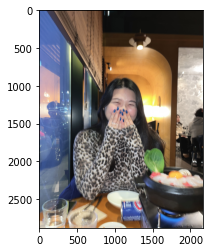

In [3]:
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
model2_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model2_file = os.path.join(model2_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') # h5로 저장

# pixellib 에서 제공하는 깃헙주소
model2_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
# urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장
urllib.request.urlretrieve(model2_url, model2_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f229748c9d0>)

In [5]:
#PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model2 = semantic_segmentation()
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model2.load_pascalvoc_model(model2_file)

모델에 이미지 입력

In [6]:
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model2.segmentAsPascalvoc(path)

In [7]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

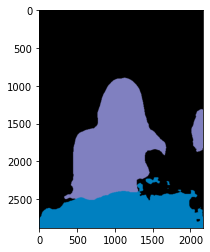

In [8]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [9]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0, 11, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [10]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
diningtable
person


다이닝 테이블을 잡아내다니!

In [11]:
# 256x3 크기의 2차원 배열을 생성하고 모든 값을 0으로 초기화
# 이 배열은 각각의 256개 색상에 대한 RGB 값을 저장할 공간을 의미
colormap = np.zeros((256, 3), dtype=int)

# 0부터 255까지의 정수 배열을 생성
# 이 배열은 각 색상에 고유한 값을 부여하는 데 사용된다.
ind = np.arange(256, dtype=int)

# 8번의 반복을 통해 각 색상의 RGB 값을 계산한다.
for shift in reversed(range(8)):
    for channel in range(3):
        # 각 채널(R, G, B)에 대해 비트 연산을 수행하여 색상 값을 결정한다. 
        # 'ind' 배열의 각 원소를 오른쪽으로 'channel' 비트만큼 이동시킨 후,
        # 1과 비트 단위 AND 연산을 수행하여 최하위 비트를 추출
        # 그리고 추출된 비트를 왼쪽으로 'shift'만큼 이동시켜 최종 색상 값을 생성
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    # 'ind' 배열의 모든 원소를 오른쪽으로 3비트만큼 이동
    ind >>= 3

# 생성된 컬러맵의 20개 색상을 출력
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
#컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15]

array([192, 128, 128])

In [13]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (128,128,192)

(2880, 2160)


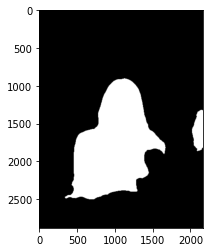

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

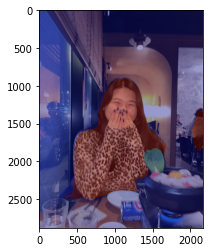

In [15]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
show = original.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
show = cv2.addWeighted(show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(show, cv2.COLOR_BGR2RGB))
plt.show()

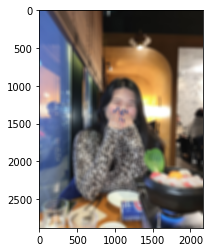

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
original_blur = cv2.blur(original, (50,50)) #처음에 13로 줬는데 너무 약해서 강하게 50, 50으로 줬다. 

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(original_blur, cv2.COLOR_BGR2RGB))
plt.show()

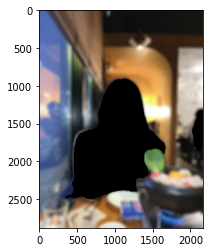

In [17]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
bg_mask = cv2.bitwise_not(mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
bg_blur = cv2.bitwise_and(original_blur, bg_mask)
plt.imshow(cv2.cvtColor(bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

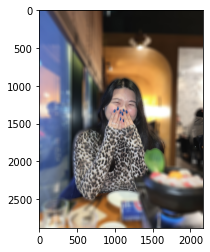

In [18]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(mask_color==255, original, bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

반대로도 해봐야지 ㅎㅎㅎ

위에서 내가 원하는 것처럼 몸부분만 원본을 활용하고 나머지부분은 블러를 주고 싶었는데 원하는 부분은 검정색으로 나오고 다른 부분은 블러처리가 안되는 문제가 생겼다. 

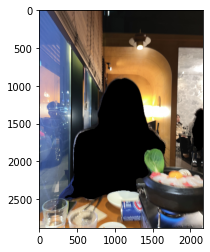

In [19]:
# 사람 부분(흰색)이면 img_orig_blur(블러 이미지)를, 그렇지 않으면 img_orig(원본 이미지)를 선택
img_concat = np.where(mask_color == [255, 255, 255], bg_blur, original)

# 이미지 표시
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

다시 노드를 보니  bg_blur를 가지고 오는게 아니라 원본 블러에서 가지고 왔어야하는데 잘못들고와서 문제가 생겼었다. 

그 이후 제대로 바른 코드로 써줬더니 내가 원하는 반대로 잘 나왔다. 

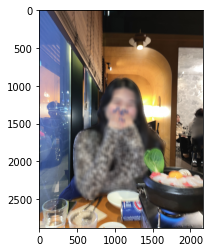

In [20]:
# 사람 부분(흰색)이면 img_orig_blur(블러 이미지)를, 그렇지 않으면 img_orig(원본 이미지)를 선택
img_concat = np.where(mask_color == [255, 255, 255], original_blur, original)

# 이미지 표시
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# Step 2. 사진에서 문제점 찾기
---
그러나 여러분들의 사진에는 무언가 문제점이 있을 것입니다.

아래 사진에도 문제점이 몇 가지 있었습니다. 예를 들어 뒤에 걸린 옷이 인물 영역에 포함되어 blur되지 않고 나온다던가 하는 경우입니다. ㅠㅠ 그 외 다른 문제들이 눈에 띄시나요? 아래 사진에는 이상한 점이 최소 2개 이상 더 있습니다. 어떤 문제가 있는지 찾아서 아래 사진처럼 표시해 봅시다.

추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

---
: 나는 나만 사람으로 인식하고 나만을 포커싱해주길 원했는데 내 뒤에 우측에 다른 사람도 계속 포커싱하는 문제가 있었다. 
그부분이 걸렸고, 이부분의 해결은...

# Step 3. 해결 방법을 제안해 보기
---
아주 간단히 멋진 카메라 앱 서비스를 만들어 출시할 수 있을 것 같았지만, 지금 같은 완성도로는 어림도 없습니다. 소비자들의 눈높이는 그리 호락호락하지 않고, 엔지니어인 여러분들은 답을 찾아내야 합니다.

생각해 볼 만한 주제를 아래에 몇 가지 제시해 봅니다. 아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리하여 제안해 주시기 바랍니다.
단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션이 아니라, 여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.

---
: 세멘틱 세그멘테이션이 아니라 인스턴스 세그멘테이션을 적용해 나만을 포커싱하는 방법을 제안해본다. 
만약 나 객체1로 생각하고 따게 되면 위 사진은 조금 더 정확한 결과가 나오지 않았을까 하는 생각이 들었다. 

In [21]:
from pixellib.instance import instance_segmentation

print('슝~')

슝~


In [22]:
# 모델을 저장할 경로
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
os.makedirs(model_dir, exist_ok=True)  # 모델 디렉토리가 없으면 생성
model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5')

# 사전 훈련된 모델의 정확한 URL
model_url = 'https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5'

# 모델 파일이 없을 경우 다운로드
if not os.path.exists(model_file):
    print("Downloading the model...")
    urllib.request.urlretrieve(model_url, model_file)
    print('Model downloaded successfully.')
else:
    print('Model file already exists.')
    
print('슝~')

Model file already exists.
슝~


In [23]:
# 인스턴스 세그멘테이션 모델 객체 생성
model3 = instance_segmentation()
model3.load_model(model_file)

Instructions for updating:
Use fn_output_signature instead


In [24]:
# 이미지에 인스턴스 세그멘테이션을 적용하고 시각화
segmask, output = model3.segmentImage(path, show_bboxes=True)

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [25]:
# COCO 데이터셋의 클래스 이름 리스트
class_names = [
    'BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
    'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

In [26]:
# 'person' 클래스 ID
person_class_id = class_names.index('person')

# 'person'에 해당하는 인스턴스를 추적하기 위한 카운터
person_counter = 1

In [27]:
# 결과 이미지에 바운딩 박스와 클래스 이름 출력
for i, class_id in enumerate(segmask['class_ids']):
    if class_id == person_class_id:
        # 'person' 인스턴스에 대한 바운딩 박스 정보
        y1, x1, y2, x2 = segmask['rois'][i]
        
        # 바운딩 박스 그리기
        cv2.rectangle(output, (x1, y1), (x2, y2), (200, 0, 250))
        
        # 'person' 라벨과 함께 고유 번호를 붙여서 표시
        label = f"person {person_counter}"
        cv2.putText(output, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (200, 0, 250), 5)
        
        # 다음 'person' 인스턴스를 위한 카운터 증가
        person_counter += 1

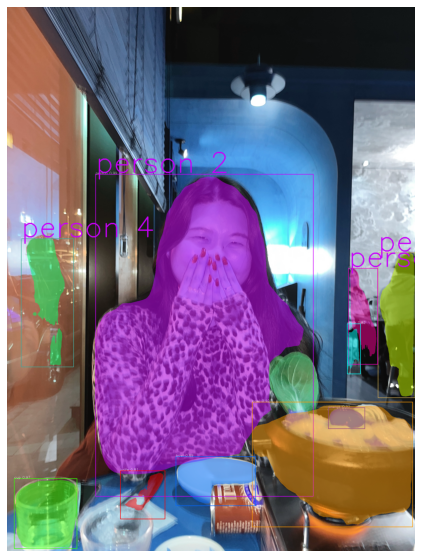

In [28]:
# 결과 이미지를 표시
plt.figure(figsize=(10,10))
plt.imshow(output)
plt.axis('off')
plt.show()

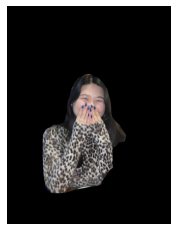

In [29]:
# 이미 식별된 'person 2'의 마스크 가져오기 
person2_mask = segmask['masks'][:, :, 1]  # 'person 2'가 두 번째 인덱스라고 가정

# 'person 2'의 마스크를 사용하여 이미지에서 해당 위치만을 추출
person2_image = cv2.bitwise_and(original, original, mask = person2_mask.astype(np.uint8))

# 시각화를 위해 BGR 이미지를 RGB 이미지로 변환
person2_image_rgb = cv2.cvtColor(person2_image, cv2.COLOR_BGR2RGB)

# 시각화
plt.imshow(person2_image_rgb)
plt.axis('off')  # 축 정보 제거
plt.show()

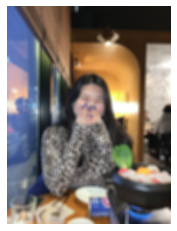

In [30]:
# 원본 이미지에 블러 처리
original_blur = cv2.blur(original, (50,50)) # 50으로 주기
plt.imshow(cv2.cvtColor(original_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 제거
plt.show()

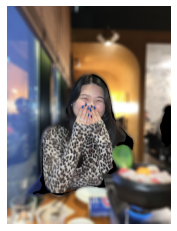

In [31]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오기
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(mask_color==255, person2_image, original_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 제거
plt.show()

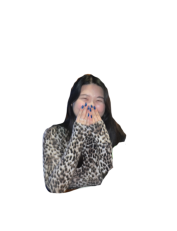

In [32]:
# 알파 채널을 추가하여 이미지를 RGBA로 변환합니다.
image_rgba = cv2.cvtColor(original, cv2.COLOR_BGR2BGRA)

# 'person 2'가 아닌 곳의 알파 값을 0으로 설정하여 투명하게 만듭니다.
image_rgba[~person2_mask, 3] = 0

# 시각화를 위해 BGRA 이미지를 RGBA로 변환합니다.
person2_image_rgba = cv2.cvtColor(image_rgba, cv2.COLOR_BGRA2RGBA)

# 시각화
plt.imshow(person2_image_rgba)
plt.axis('off')  # 축 정보 제거
plt.show()

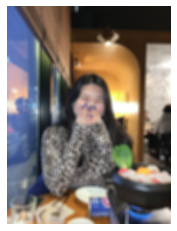

In [33]:
# 블러 처리된 이미지에 알파 채널을 추가하여 RGBA 형식으로 변환 -> 차원 맞춰주기 : 투명도 A 사용을 위해
original_blur_rgba = cv2.cvtColor(original_blur, cv2.COLOR_BGR2BGRA)

# RGBA 형식의 블러 처리된 이미지를 시각화
plt.imshow(cv2.cvtColor(original_blur_rgba, cv2.COLOR_BGRA2RGBA))
plt.axis('off')  # 축 정보 제거
plt.show()

In [34]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오기
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(mask_color==255, image_rgba, original_blur_rgba)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 제거
plt.show()

ValueError: operands could not be broadcast together with shapes (2880,2160,3) (2880,2160,4) (2880,2160,4) 

위에서 처럼 차원을 고려하지 않고 만드려고 했기에 그 부분을 고치기 위해서 mask_color 부분에도 차원을 추가

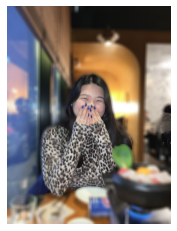

In [35]:
# mask_color에 알파 채널을 추가하고, 이를 255(완전 불투명)로 설정
mask_color_rgba = np.concatenate((mask_color, 255 * np.ones((*mask_color.shape[:2], 1), dtype=mask_color.dtype)), axis=2)

# 이후 업데이트된 mask_color_rgba를 사용하여 np.where 실행
img_concat = np.where(mask_color_rgba == 255, image_rgba, original_blur_rgba)

# 이미지 표시
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

위에서 person2 옆에 거슬리던 검정색 부분을 투명 A 로 처리하고 나머지 부분을 original_blur_rgba 로 채워줘 깔끔한 인물사진 모드를 완성했다. 

여기에서 RGBA 란?

RGBA는 이미지의 색상과 투명도를 나타내는 방식 중 하나입니다. 이 포맷은 각각의 픽셀에 대해 네 가지 주요 구성 요소를 사용합니다:

R (Red, 빨간색): 픽셀의 빨간색 성분을 나타냅니다.
G (Green, 초록색): 픽셀의 초록색 성분을 나타냅니다.
B (Blue, 파란색): 픽셀의 파란색 성분을 나타냅니다.
A (Alpha, 알파 채널): 픽셀의 투명도를 나타냅니다. 알파 값이 0이면 완전히 투명하고, 255이면 완전히 불투명합니다.
RGBA 포맷은 주로 디지털 이미지에서 사용되며, 각 채널은 보통 0에서 255 사이의 값을 가집니다. 이 포맷을 사용하면 이미지의 색상뿐만 아니라 투명도도 조절할 수 있어, 복잡한 이미지 처리와 효과에 유용합니다. 예를 들어, 이미지를 다른 이미지나 배경 위에 겹치거나, 투명한 효과를 줄 때 사용됩니다.

In [36]:
path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_1107.jpeg'
original1 = cv2.imread(path1)

print(original1.shape)

(4032, 3024, 3)


In [37]:
path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_1132.jpeg'
original2 = cv2.imread(path2)

print(original2.shape)

(2048, 1536, 3)


In [38]:
path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/IMG_1134.jpeg'
original3 = cv2.imread(path3)

print(original3.shape)

(2048, 1536, 3)


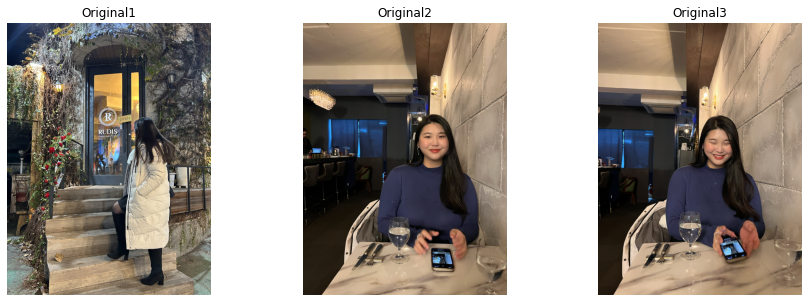

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # 1행 3열의 서브플롯 생성

# original1 이미지 출력
axes[0].imshow(cv2.cvtColor(original1, cv2.COLOR_BGR2RGB))
axes[0].axis('off')  # 축 정보 제거
axes[0].set_title('Original1')

# original2 이미지 출력
axes[1].imshow(cv2.cvtColor(original2, cv2.COLOR_BGR2RGB))
axes[1].axis('off')  # 축 정보 제거
axes[1].set_title('Original2')

# original3 이미지 출력
axes[2].imshow(cv2.cvtColor(original3, cv2.COLOR_BGR2RGB))
axes[2].axis('off')  # 축 정보 제거
axes[2].set_title('Original3')

plt.show()

In [40]:
# COCO 데이터셋의 클래스 이름 리스트
class_names = [
    'BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
    'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

In [41]:
# path1 이미지에 대한 인스턴스 세그멘테이션 적용
segmask1, output1 = model3.segmentImage(path1, show_bboxes=True)

# path2 이미지에 대한 인스턴스 세그멘테이션 적용
segmask2, output2 = model3.segmentImage(path2, show_bboxes=True)

# path3 이미지에 대한 인스턴스 세그멘테이션 적용
segmask3, output3 = model3.segmentImage(path3, show_bboxes=True)

In [42]:
# 'person' 클래스 ID
person_class_id = class_names.index('person')

# 'person'에 해당하는 인스턴스를 추적하기 위한 카운터
person_counter = 1

In [43]:
# 바운드 박스와 객체 탐지
# output1 이미지에 대한 처리
person_counter = 1  # 카운터를 각 이미지에 대해 리셋
for i, class_id in enumerate(segmask1['class_ids']):
    if class_id == person_class_id:
        y1, x1, y2, x2 = segmask1['rois'][i]
        cv2.rectangle(output1, (x1, y1), (x2, y2), (200, 0, 250))
        label = f"person {person_counter}"
        cv2.putText(output1, label, (x1, y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (200, 0, 250), 2)
        person_counter += 1

# output2 이미지에 대한 처리
person_counter = 1  # 카운터를 각 이미지에 대해 리셋
for i, class_id in enumerate(segmask2['class_ids']):
    if class_id == person_class_id:
        y1, x1, y2, x2 = segmask2['rois'][i]
        cv2.rectangle(output2, (x1, y1), (x2, y2), (200, 0, 250))
        label = f"person {person_counter}"
        cv2.putText(output2, label, (x1, y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (200, 0, 250), 2)
        person_counter += 1

# output3 이미지에 대한 처리
person_counter = 1  # 카운터를 각 이미지에 대해 리셋
for i, class_id in enumerate(segmask3['class_ids']):
    if class_id == person_class_id:
        y1, x1, y2, x2 = segmask3['rois'][i]
        cv2.rectangle(output3, (x1, y1), (x2, y2), (200, 0, 250))
        label = f"person {person_counter}"
        cv2.putText(output3, label, (x1, y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (200, 0, 250), 2)
        person_counter += 1

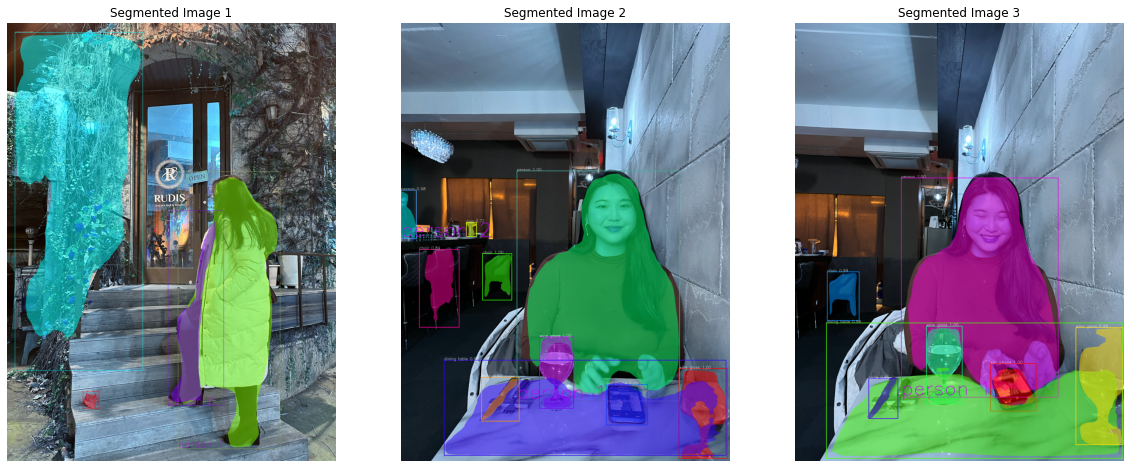

In [44]:
# 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(output1)
axes[0].axis('off')
axes[0].set_title('Segmented Image 1')

axes[1].imshow(output2)
axes[1].axis('off')
axes[1].set_title('Segmented Image 2')

axes[2].imshow(output3)
axes[2].axis('off')
axes[2].set_title('Segmented Image 3')

plt.show()

In [45]:
# 'Segmented Image 1'에서 'person 1'의 마스크 추출
person1_mask_seg1 = segmask1['masks'][:, :, 0]

# 'person 1'와 'person 2'의 마스크를 사용하여 Segmented Image 1에서 해당 위치만을 추출
person1_image_seg1 = cv2.bitwise_and(original1, original1, mask=person1_mask_seg1.astype(np.uint8))

# 'person 1'과 'person 2'의 RGBA 이미지로 변경
person1_image_seg1_rgba = cv2.cvtColor(person1_image_seg1, cv2.COLOR_BGR2BGRA)

# 알파 채널을 255로 설정하여 완전 불투명하게 함
person1_image_seg1_rgba[:, :, 3] = 255

# 'Segmented Image 2'에서 'person 1'의 마스크 추출
person1_mask_seg2 = segmask2['masks'][:, :, 0]  # 'person 1'이 첫 번째 인스턴스라고 가정

# 'person 1'의 마스크를 사용하여 Segmented Image 2에서 해당 위치만을 추출
person1_image_seg2 = cv2.bitwise_and(original2, original2, mask=person1_mask_seg2.astype(np.uint8))

# 'Segmented Image 2'에서 'person 1'의 RGBA 이미지로 변경
person1_image_seg2_rgba = cv2.cvtColor(person1_image_seg2, cv2.COLOR_BGR2BGRA)


# 'Segmented Image 3'에서 'person 1'의 마스크 추출
person1_mask_seg3 = segmask3['masks'][:, :, 0]  # 'person 1'이 첫 번째 인스턴스라고 가정

# 'person 1'의 마스크를 사용하여 Segmented Image 3에서 해당 위치만을 추출
person1_image_seg3 = cv2.bitwise_and(original3, original3, mask=person1_mask_seg3.astype(np.uint8))

# 'Segmented Image 3'에서 'person 1'의 RGBA 이미지로 변경
person1_image_seg3_rgba = cv2.cvtColor(person1_image_seg3, cv2.COLOR_BGR2BGRA)


# 알파 채널을 255로 설정하여 완전 불투명하게 함
person1_image_seg1_rgba[:, :, 3] = 255
person1_image_seg2_rgba[:, :, 3] = 255
person1_image_seg3_rgba[:, :, 3] = 255

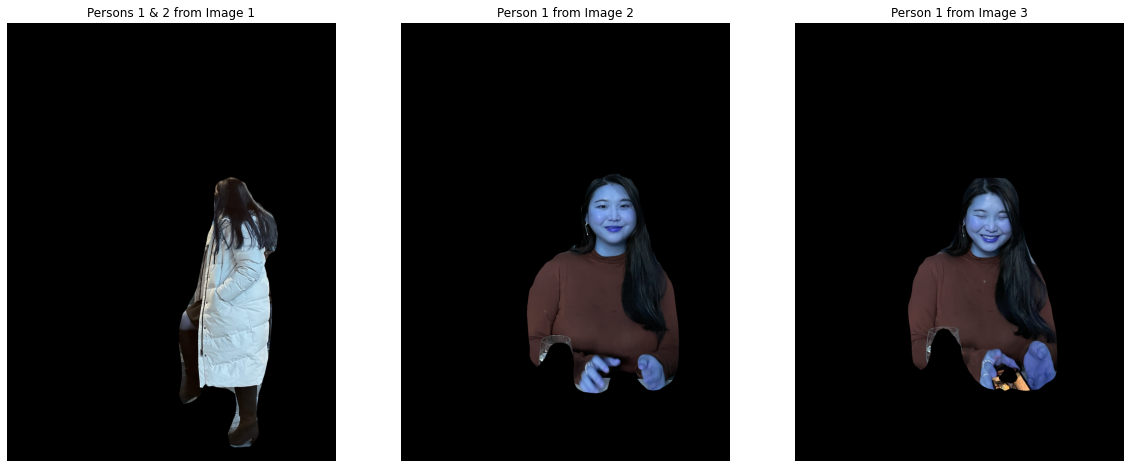

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))  # 1행 3열의 서브플롯 생성

# 첫 번째 서브플롯에 'Segmented Image 1'의 'person 1'과 'person 2'의 연결된 이미지 표시
axes[0].imshow(person1_image_seg1_rgba)
axes[0].axis('off')
axes[0].set_title('Persons 1 & 2 from Image 1')

# 두 번째 서브플롯에 'Segmented Image 2'의 'person 1' 표시
axes[1].imshow(person1_image_seg2_rgba)
axes[1].axis('off')
axes[1].set_title('Person 1 from Image 2')

# 세 번째 서브플롯에 'Segmented Image 3'의 'person 1' 표시
axes[2].imshow(person1_image_seg3_rgba)
axes[2].axis('off')
axes[2].set_title('Person 1 from Image 3')

# 시각화 실행
plt.show()

In [47]:
# 원본 이미지를 RGBA 형식으로 변환
original1_rgba = cv2.cvtColor(original1, cv2.COLOR_BGR2BGRA)
original2_rgba = cv2.cvtColor(original2, cv2.COLOR_BGR2BGRA)
original3_rgba = cv2.cvtColor(original3, cv2.COLOR_BGR2BGRA)

In [48]:
# 원본 이미지들에 대한 블러 처리
original_blur1 = cv2.blur(original1, (50,50))
original_blur2 = cv2.blur(original2, (50,50))
original_blur3 = cv2.blur(original3, (50,50))

# 블러 처리된 이미지들을 RGBA 형식으로 변환
original_blur1_rgba = cv2.cvtColor(original_blur1, cv2.COLOR_BGR2BGRA)
original_blur2_rgba = cv2.cvtColor(original_blur2, cv2.COLOR_BGR2BGRA)
original_blur3_rgba = cv2.cvtColor(original_blur3, cv2.COLOR_BGR2BGRA)

# 알파 채널을 255로 설정하여 완전 불투명하게 함
original_blur1_rgba[:, :, 3] = 255
original_blur2_rgba[:, :, 3] = 255
original_blur3_rgba[:, :, 3] = 255

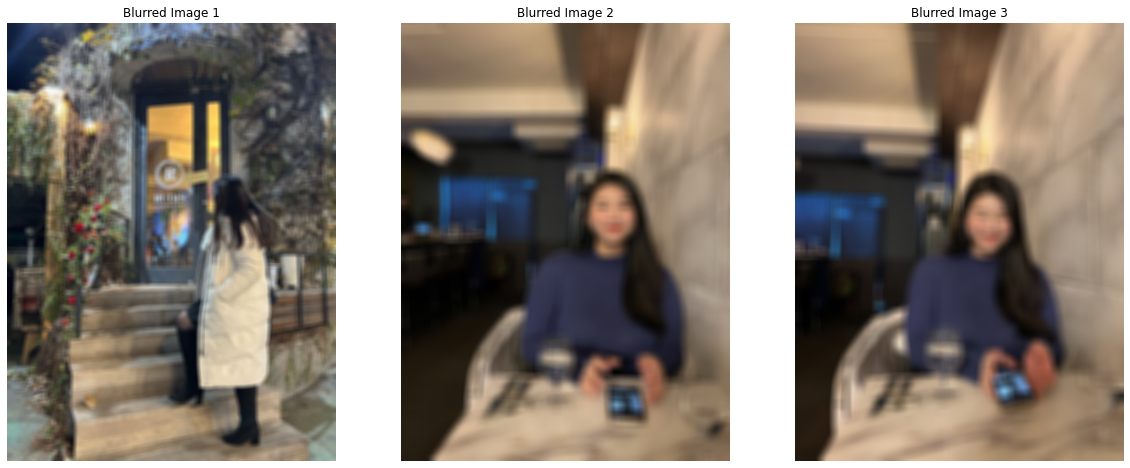

In [49]:
# 블러 처리된 이미지들을 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(cv2.cvtColor(original_blur1_rgba, cv2.COLOR_BGRA2RGBA))
axes[0].axis('off')
axes[0].set_title('Blurred Image 1')

axes[1].imshow(cv2.cvtColor(original_blur2_rgba, cv2.COLOR_BGRA2RGBA))
axes[1].axis('off')
axes[1].set_title('Blurred Image 2')

axes[2].imshow(cv2.cvtColor(original_blur3_rgba, cv2.COLOR_BGRA2RGBA))
axes[2].axis('off')
axes[2].set_title('Blurred Image 3')

plt.show()

In [50]:
# 'person' 클래스에 해당하는 마스크만 추출하여 합산
mask1 = np.sum(segmask1['masks'][:, :, segmask1['class_ids'] == person_class_id], axis=-1)
mask2 = np.sum(segmask2['masks'][:, :, segmask2['class_ids'] == person_class_id], axis=-1)
mask3 = np.sum(segmask3['masks'][:, :, segmask3['class_ids'] == person_class_id], axis=-1)

# 이진 마스크 생성
mask1 = mask1 > 0
mask2 = mask2 > 0
mask3 = mask3 > 0

# RGBA 형식으로 마스크 변환
mask1_rgba = np.concatenate((mask1[:, :, None], mask1[:, :, None], mask1[:, :, None], np.ones((*mask1.shape, 1), dtype=mask1.dtype)), axis=2)
mask2_rgba = np.concatenate((mask2[:, :, None], mask2[:, :, None], mask2[:, :, None], np.ones((*mask2.shape, 1), dtype=mask2.dtype)), axis=2)
mask3_rgba = np.concatenate((mask3[:, :, None], mask3[:, :, None], mask3[:, :, None], np.ones((*mask3.shape, 1), dtype=mask3.dtype)), axis=2)

# np.where를 사용하여 조건에 따라 이미지 선택
img_concat1 = np.where(mask1_rgba == 1, original1_rgba, original_blur1_rgba)
img_concat2 = np.where(mask2_rgba == 1, original2_rgba, original_blur2_rgba)
img_concat3 = np.where(mask3_rgba == 1, original3_rgba, original_blur3_rgba)

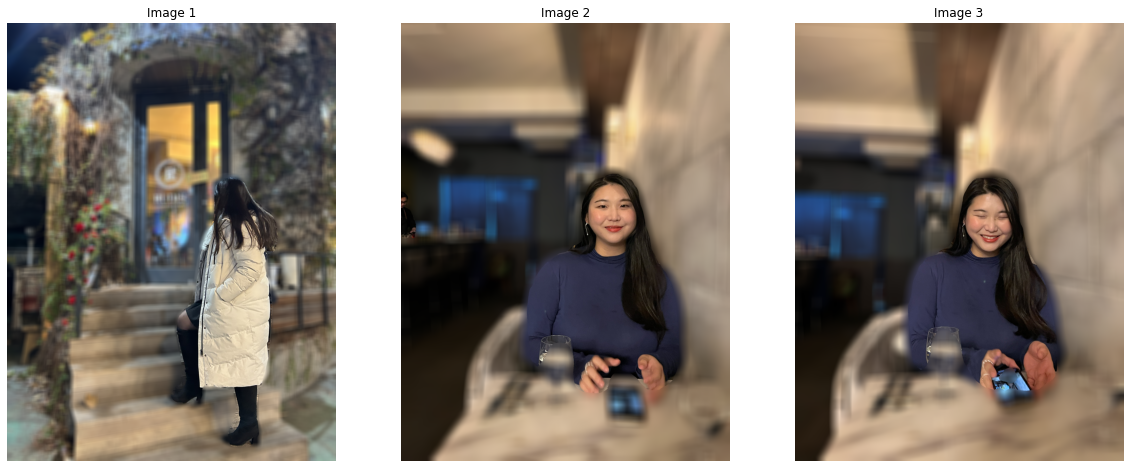

In [51]:
# 서브플롯을 사용하여 세 이미지 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# 첫 번째 이미지 표시
axes[0].imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGRA2RGBA))
axes[0].axis('off')
axes[0].set_title('Image 1')

# 두 번째 이미지 표시
axes[1].imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGRA2RGBA))
axes[1].axis('off')
axes[1].set_title('Image 2')

# 세 번째 이미지 표시
axes[2].imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGRA2RGBA))
axes[2].axis('off')
axes[2].set_title('Image 3')

plt.show()

# 회고
---

Keep:세멘틱 시그멘테이션으로 해결되지 않는 것에 불편함을 느끼고 새로운 방법을 고안한 것.

Problem: 위에서 설명한 RGBA 를 사용하게 되면서 RGB일 때 차원이 3개이던 것이 4개가 되면서 차원 맞추는 부분에서 에러가 계속 떴다. 
이부분에서 공부를 더 할 수 있어서 좋았다. 

Try: 그동안 쓰던 RGB에서 멈추는 것이아니라 alpha 채널을 추가한 RGBA 를 사용해 훨씬 정교한 이미지를 만들 수 있었다.
그리고 하나의 이미지만 진행하는 것이 아니라 여러 이미지를 가지고 와서 진행을 해보았다. 